<div style="display: flex; justify-content: space-between; align-items: center;">

  <div style="flex: 1;">
    <h1 style="font-size: 35px; margin-bottom: 10px;"> ADS 542 - Statistical Learning Project</h1>
    <h2 style="font-size: 28px; margin-top: 20px;"> Car Insurance Claim Prediction</h2>
    <p style="font-size: 15px; margin-top: 20px;">
      <b>Prepared by:</b> Şeyma Gülşen Akkuş<br>
      <b>Date:</b> 28.04.2025
    </p>
  </div>
  <div style="flex-shrink: 0;">
    <img src="https://www.tedu.edu.tr/themes/custom/tedu/logo.svg" width="350px" style="margin-left: 40px;">
  </div>
</div>

## Table of Contents

1. [Project Description & Objective](#1-project-description--objective)
2. [Dataset Overview](#2-dataset-overview)
3. [Data Cleaning](#4-data-cleaning)
4. [Feature Engineering & Selection](#5-feature-engineering--selection)
5. [Data Preprocessing](#3-data-preprocessing)
6. [Model Training & Selection](#6-model-training--selection)
7. [Hyperparameter Tuning](#7-hyperparameter-tuning)
8. [Model Evaluation](#8-model-evaluation)
9. [Pipeline Construction](#9-pipeline-construction)

## 1. Project Description & Objective

The goal of this project is to build a classification model to predict whether a car insurance policyholder will file a claim based on various personal, vehicle, and insurance-related features.

Key tasks:
- Perform data cleaning and preprocessing.
- Compare multiple classification models.
- Select the best model through evaluation metrics and hyperparameter tuning.
- Build an end-to-end pipeline and deploy the final model using Streamlit.

## 2. Dataset Overview

In [6]:
#Libraries

# Modules
import os
import sys
import re
import datetime
from pathlib import Path
import time

# Data Processing Libraries
import pandas as pd         # for data handling
import numpy as np          # for numerical operations
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Data Visualization Libraries
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
import dash
import pylab
import scipy.stats as st
import matplotlib.pyplot as plt


# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.width', 1500) 

# Statistics Libraries
from scipy import stats as st
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import chi2_contingency
from scipy import linalg
from scipy.stats import zscore
import seaborn as sns

# Jupyter enhancements
from IPython.display import display, HTML

# Plot settings
sns.set_context('notebook')          # good size for notebooks
sns.set_style('darkgrid')            # background style
sns.set_palette('Set2')              # soft color palette

import scikit_posthocs as sp

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestRegressor
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [7]:
%%time

# Load data
data = pd.read_csv("Car_Insurance_Claim.csv")
data

CPU times: total: 15.6 ms
Wall time: 26.1 ms


,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0


In [8]:
data.columns

Index(['ID', 'AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'OUTCOME'], dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

#### ✅ 1. Numerical Columns

These are either **continuous** (real numbers) or **discrete** (integers or counts). They can be used directly in statistical models, with scaling or transformation if needed.

| Column Name          | Type          | Description                                                                 |
|----------------------|---------------|-----------------------------------------------------------------------------|
| `CREDIT_SCORE`       | Float          | Normalized credit score (range: 0–1). Continuous feature.                   |
| `VEHICLE_OWNERSHIP`  | Float (0/1)    | Binary (1 = owns a car). Could be treated as categorical.                   |
| `MARRIED`            | Float (0/1)    | Binary. Can be treated as categorical.                                      |
| `CHILDREN`           | Float (0/1)    | Binary. Can be treated as categorical.                                      |
| `POSTAL_CODE`        | Integer        | High-cardinality ID-like feature. Not useful for modeling.                  |
| `ANNUAL_MILEAGE`     | Float          | Estimated miles driven annually. Continuous feature.                        |
| `SPEEDING_VIOLATIONS`| Integer        | Count of speeding violations. Discrete numerical feature.                   |
| `DUIS`               | Integer        | Count of DUI violations. Discrete.                                          |
| `PAST_ACCIDENTS`     | Integer        | Number of past accidents. Discrete.                                         |
| `OUTCOME`            | Float (0/1)    | Target variable. 1 = filed insurance claim, 0 = did not.                    |
| `ID`                 | Integer        | Identifier. Should be dropped. Not a feature.                               |

> 🔸 **Note:** Although `VEHICLE_OWNERSHIP`, `MARRIED`, and `CHILDREN` are numerical (0/1), they’re often treated as **binary categorical variables** in machine learning models.


#### ✅ 2. Categorical Columns

These are string-based or encoded categories. They must be encoded (e.g., using Label Encoding or One-Hot Encoding) for use in machine learning models.

| Column Name           | Description                                                                |
|------------------------|----------------------------------------------------------------------------|
| `AGE`                  | Age group (e.g., 16–25, 26–39, 65+). Ordinal categorical.                 |
| `GENDER`               | 'male' or 'female'. Nominal categorical.                                  |
| `RACE`                 | Social/ethnic majority/minority status. Nominal.                          |
| `DRIVING_EXPERIENCE`   | Experience range (e.g., 0–9y, 10–19y). Ordinal.                           |
| `EDUCATION`            | Level of education (e.g., none, high school, university). Ordinal.        |
| `INCOME`               | Income class (e.g., poverty, working class). Ordinal.                     |
| `VEHICLE_YEAR`         | 'before 2015', 'after 2015'. Binary categorical.                          |
| `VEHICLE_TYPE`         | e.g., 'sedan', 'sports car'. Nominal.                                     |

In [12]:
data.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


In [13]:
data.isnull().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

In the dataset, there are total *982 + 957 = 1939* Null values on CREDIT_SCORE and ANNUAL_MILEAGE.

## 3. Data Cleaning

### Handled missing values

In [17]:
# Check missing summary
missing_df = data[['CREDIT_SCORE', 'ANNUAL_MILEAGE']].isnull().mean()
print("Missing percentages:\n", missing_df)

Missing percentages:
 CREDIT_SCORE      0.0982
ANNUAL_MILEAGE    0.0957
dtype: float64


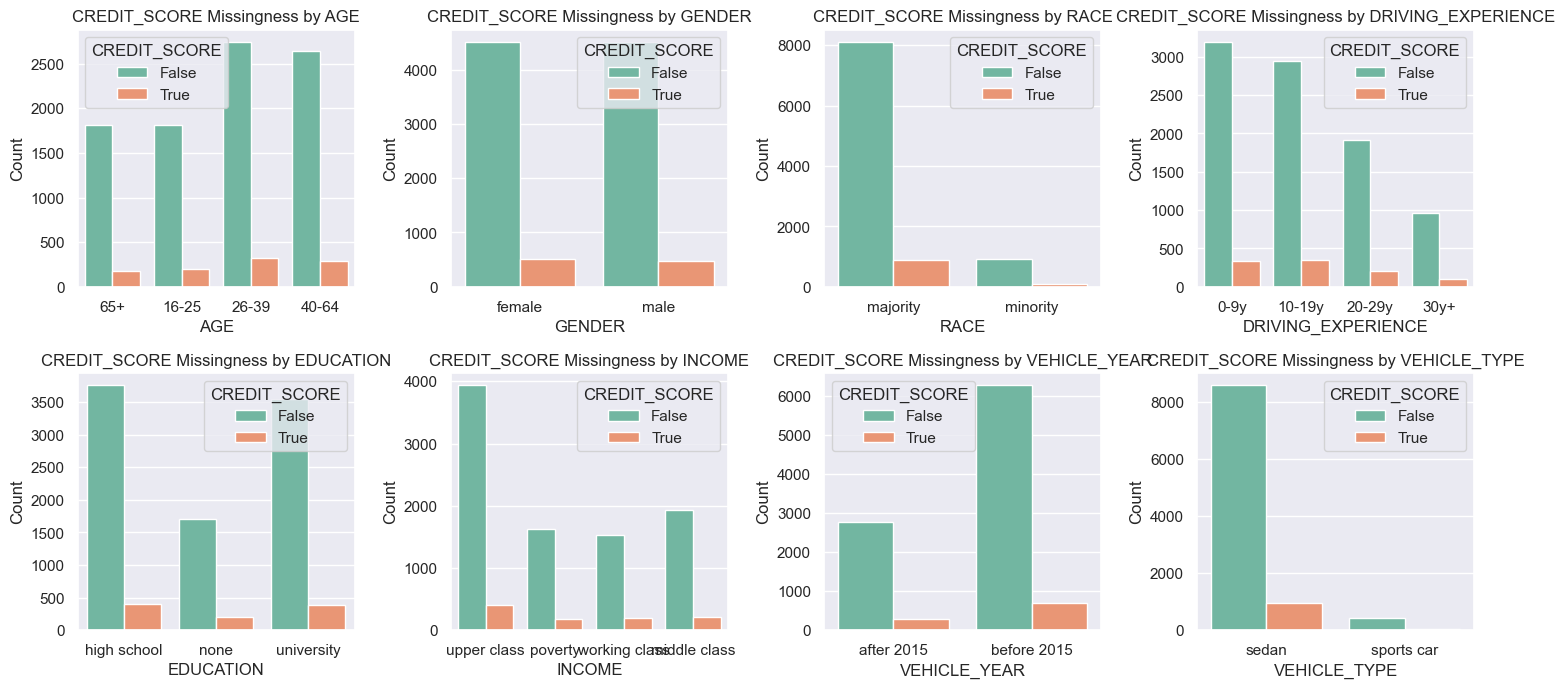

In [18]:
# List of categorical columns 
categorical_col = ['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 
                   'EDUCATION', 'INCOME', 'VEHICLE_YEAR', 'VEHICLE_TYPE']

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Loop through each categorical feature and create a bar chart
for idx, col in enumerate(categorical_col):
    plt.subplot(3, 4, idx + 1)  # Use idx to generate subplot index
    sns.countplot(data=data, x=col, hue=data['CREDIT_SCORE'].isnull())
    plt.title(f'CREDIT_SCORE Missingness by {col}')
    plt.ylabel("Count")  # Proportion is misleading here unless you normalize

plt.tight_layout()
plt.show()

1) AGE: 26–39 and 40–64 groups have relatively more missing CREDIT_SCORE.,
2) GENDER: No big imbalance between male/female → not very predictive.
3) INCOME: Most missing values are from upper class — interesting pattern.
4) EDUCATION: "none" has higher missingness — makes sense.
5) DRIVING_EXPERIENCE: 0–19y groups have more missing — possibly less history.
6) VEHICLE_YEAR: More missingness in cars from before 2015.
7) SPEEDING_VIOLATIONS, DUIS, PAST_ACCIDENTS: No strong signal of high missingness skew here, but mild increase at low values (suggesting less credit exposure in lower-risk profiles).

Missing values are not completely at random (MCAR) → they depend on other features. This confirms we should not drop them and should use model-based imputation.

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# 1. Copy the data
df_impute = data.copy()

# 2. Label encode categorical columns
label_encoders = {}
for col in categorical_col:
    le = LabelEncoder()
    df_impute[col] = le.fit_transform(df_impute[col].astype(str))
    label_encoders[col] = le

# 3. Split rows with and without CREDIT_SCORE
notnull_cs = df_impute[df_impute['CREDIT_SCORE'].notnull()]
null_cs = df_impute[df_impute['CREDIT_SCORE'].isnull()]

# 4. Select features to predict CREDIT_SCORE
features_cs = ['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
               'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED', 'CHILDREN',
               'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'OUTCOME']

# 5. Train model
rf_cs = RandomForestRegressor(n_estimators=100, random_state=42)
rf_cs.fit(notnull_cs[features_cs], notnull_cs['CREDIT_SCORE'])

# 6. Predict missing values
predicted_cs = rf_cs.predict(null_cs[features_cs])

# 7. Fill missing values in original data
df_impute.loc[df_impute['CREDIT_SCORE'].isnull(), 'CREDIT_SCORE'] = predicted_cs

In [21]:
df_impute.isnull().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE             0
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

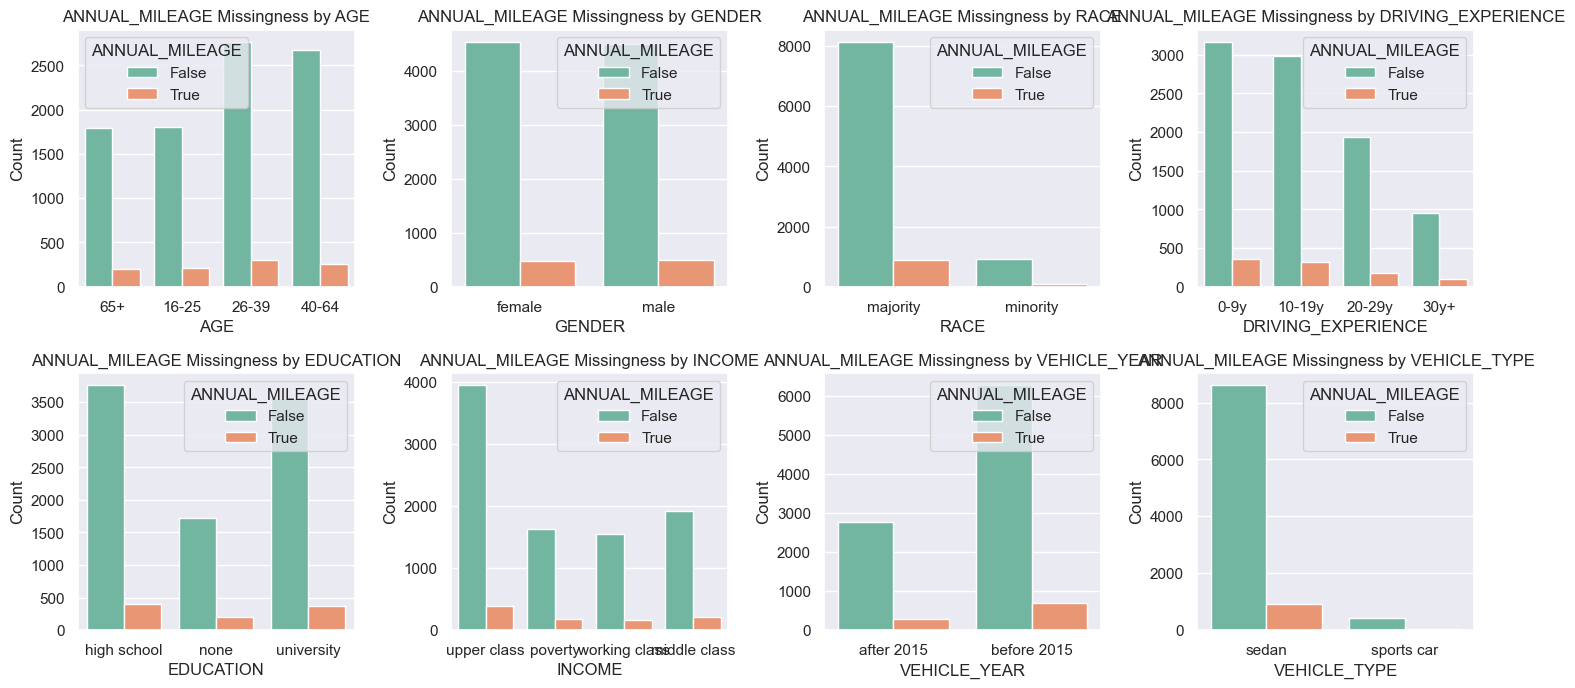

In [22]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Loop through each categorical feature and create a bar chart
for idx, col in enumerate(categorical_col):
    plt.subplot(3, 4, idx + 1)  # Use idx to generate subplot index
    sns.countplot(data=data, x=col, hue=data['ANNUAL_MILEAGE'].isnull())
    plt.title(f'ANNUAL_MILEAGE Missingness by {col}')
    plt.ylabel("Count")  # Proportion is misleading here unless you normalize

plt.tight_layout()
plt.show()

Again, missing values are not completely at random (MCAR) → they depend on other features. So, we should not drop them and should use model-based imputation.

In [24]:
# 1. Split rows with and without ANNUAL_MILEAGE
notnull_mileage = df_impute[df_impute['ANNUAL_MILEAGE'].notnull()]
null_mileage = df_impute[df_impute['ANNUAL_MILEAGE'].isnull()]

# 2. Select features for prediction
features_mileage = ['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
                    'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED', 'CHILDREN',
                    'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'OUTCOME']

# 3. Train model
rf_mileage = RandomForestRegressor(n_estimators=100, random_state=42)
rf_mileage.fit(notnull_mileage[features_mileage], notnull_mileage['ANNUAL_MILEAGE'])

# 4. Predict missing values
predicted_mileage = rf_mileage.predict(null_mileage[features_mileage])

# 5. Fill the missing values
df_impute.loc[df_impute['ANNUAL_MILEAGE'].isnull(), 'ANNUAL_MILEAGE'] = predicted_mileage


In [25]:
df_impute.isnull().sum()

ID                     0
AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

### Target variable distribution

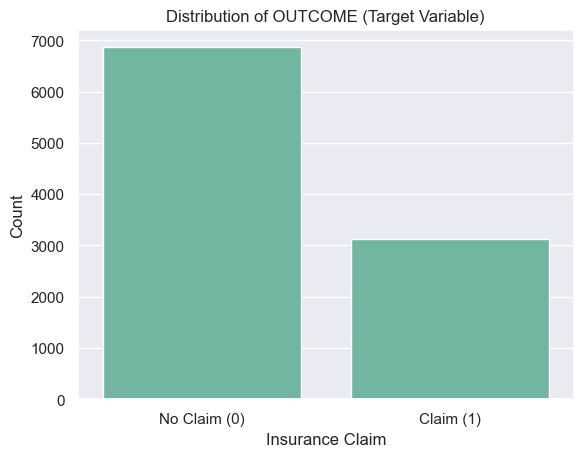

In [27]:
sns.countplot(data=df_impute, x='OUTCOME')
plt.title('Distribution of OUTCOME (Target Variable)')
plt.xlabel('Insurance Claim')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Claim (0)', 'Claim (1)'])
plt.show()

In [28]:
outcome_counts = df_impute['OUTCOME'].value_counts()
outcome_percent = df_impute['OUTCOME'].value_counts(normalize=True) * 100

print("📌 OUTCOME Distribution (Counts):")
print(outcome_counts)
print("\n📌 OUTCOME Distribution (Percentages):")
print(outcome_percent.round(2))

📌 OUTCOME Distribution (Counts):
OUTCOME
0.0    6867
1.0    3133
Name: count, dtype: int64

📌 OUTCOME Distribution (Percentages):
OUTCOME
0.0    68.67
1.0    31.33
Name: proportion, dtype: float64


We can see that there is a clear imbalancy in the target variable. We should handle this before training our model.

**What we will do?**
- Start with " class_weight='balanced' ". Because, it’s simple, clean, and built into most models. It adjusts the model’s loss function without altering the dataset. Then, we will check F1-score and ROC-AUC.
- If performance is not acceptable, then we will move to oversampling (e.g., SMOTE) techniques.

## 4. Feature Engineering & Selection

In [32]:
# Drop non-informative fields
df_cleaned = df_impute.drop(columns=['ID', 'POSTAL_CODE'])

In [33]:
initial_shape = df_cleaned.shape
initial_shape

(10000, 17)

In [34]:
# Check for duplicated rows
df_cleaned.duplicated().sum()

20

In [35]:
# Drop duplicated rows
df_cleaned = df_cleaned.drop_duplicates()

In [36]:
df_cleaned.shape

(9980, 17)

In [37]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9980 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  9980 non-null   int32  
 1   GENDER               9980 non-null   int32  
 2   RACE                 9980 non-null   int32  
 3   DRIVING_EXPERIENCE   9980 non-null   int32  
 4   EDUCATION            9980 non-null   int32  
 5   INCOME               9980 non-null   int32  
 6   CREDIT_SCORE         9980 non-null   float64
 7   VEHICLE_OWNERSHIP    9980 non-null   float64
 8   VEHICLE_YEAR         9980 non-null   int32  
 9   MARRIED              9980 non-null   float64
 10  CHILDREN             9980 non-null   float64
 11  ANNUAL_MILEAGE       9980 non-null   float64
 12  VEHICLE_TYPE         9980 non-null   int32  
 13  SPEEDING_VIOLATIONS  9980 non-null   int64  
 14  DUIS                 9980 non-null   int64  
 15  PAST_ACCIDENTS       9980 non-null   int64 

In [38]:
# Fix data type consistency
binary_cols = ['VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN', 'OUTCOME']
df_cleaned[binary_cols] = df_cleaned[binary_cols].astype(int)

In [39]:
df_cleaned['RISK_SCORE'] = (
    df_cleaned['SPEEDING_VIOLATIONS'] +
    df_cleaned['DUIS'] * 3 +
    df_cleaned['PAST_ACCIDENTS'] * 2
)

##### Feature Explanation: `RISK_SCORE`

This feature combines multiple driver behavior variables into a single composite **risk score**, aiming to quantify the overall driving risk of a policyholder.

###### Weighting Scheme:
- **DUI violations**: Weighted ×3 *(high severity)*
- **Past accidents**: Weighted ×2 *(moderate severity)*
- **Speeding violations**: Counted as-is *(less severe)*

###### Purpose:
The engineered `RISK_SCORE` serves as a valuable predictor in the classification task. A **higher RISK_SCORE** is associated with a **greater likelihood of an insurance claim** (i.e., when `OUTCOME = 1`).

By reflecting the cumulative impact of risky driving behaviors, this feature enhances the model's ability to identify high-risk policyholders.


In [41]:
mileage_median = df_cleaned['ANNUAL_MILEAGE'].median()
df_cleaned['HIGH_MILEAGE'] = (df_cleaned['ANNUAL_MILEAGE'] > mileage_median).astype(int)

##### Feature Explanation: `HIGH_MILEAGE`

**Annual Usage Indicator**

This is a **binary feature** that identifies vehicles with **above-median annual mileage**.

###### Definition:
- Returns **1** if the vehicle's mileage is **above the dataset's median**
- Returns **0** otherwise

###### Purpose:
Vehicles with **higher annual mileage** spend more time on the road, increasing their **exposure to potential accidents**. This feature captures that **latent risk factor**, contributing to better risk assessment in the classification model.


In [43]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9980 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  9980 non-null   int32  
 1   GENDER               9980 non-null   int32  
 2   RACE                 9980 non-null   int32  
 3   DRIVING_EXPERIENCE   9980 non-null   int32  
 4   EDUCATION            9980 non-null   int32  
 5   INCOME               9980 non-null   int32  
 6   CREDIT_SCORE         9980 non-null   float64
 7   VEHICLE_OWNERSHIP    9980 non-null   int32  
 8   VEHICLE_YEAR         9980 non-null   int32  
 9   MARRIED              9980 non-null   int32  
 10  CHILDREN             9980 non-null   int32  
 11  ANNUAL_MILEAGE       9980 non-null   float64
 12  VEHICLE_TYPE         9980 non-null   int32  
 13  SPEEDING_VIOLATIONS  9980 non-null   int64  
 14  DUIS                 9980 non-null   int64  
 15  PAST_ACCIDENTS       9980 non-null   int64 

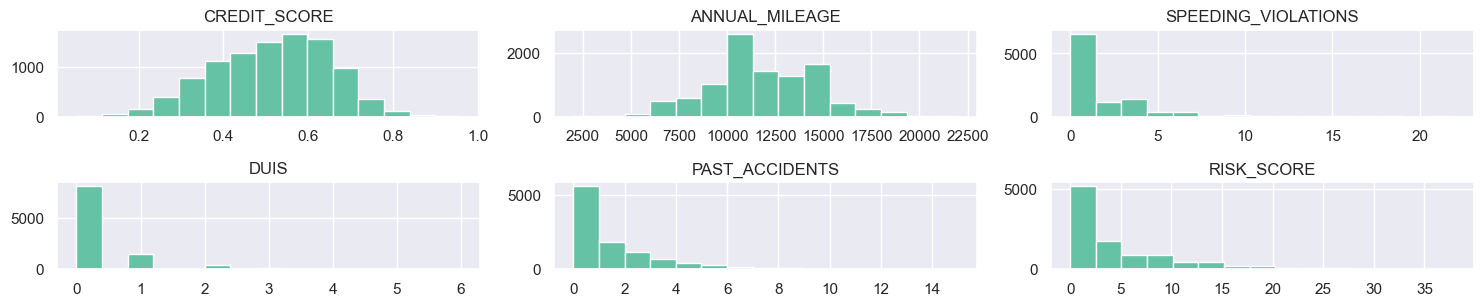

In [44]:
# List of numerical columns to plot
numerical_cols = ['CREDIT_SCORE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'RISK_SCORE']

# Plot histograms
df_cleaned[numerical_cols].hist(bins=15, figsize=(15, 6), layout=(4, 3))
plt.tight_layout()
plt.show()


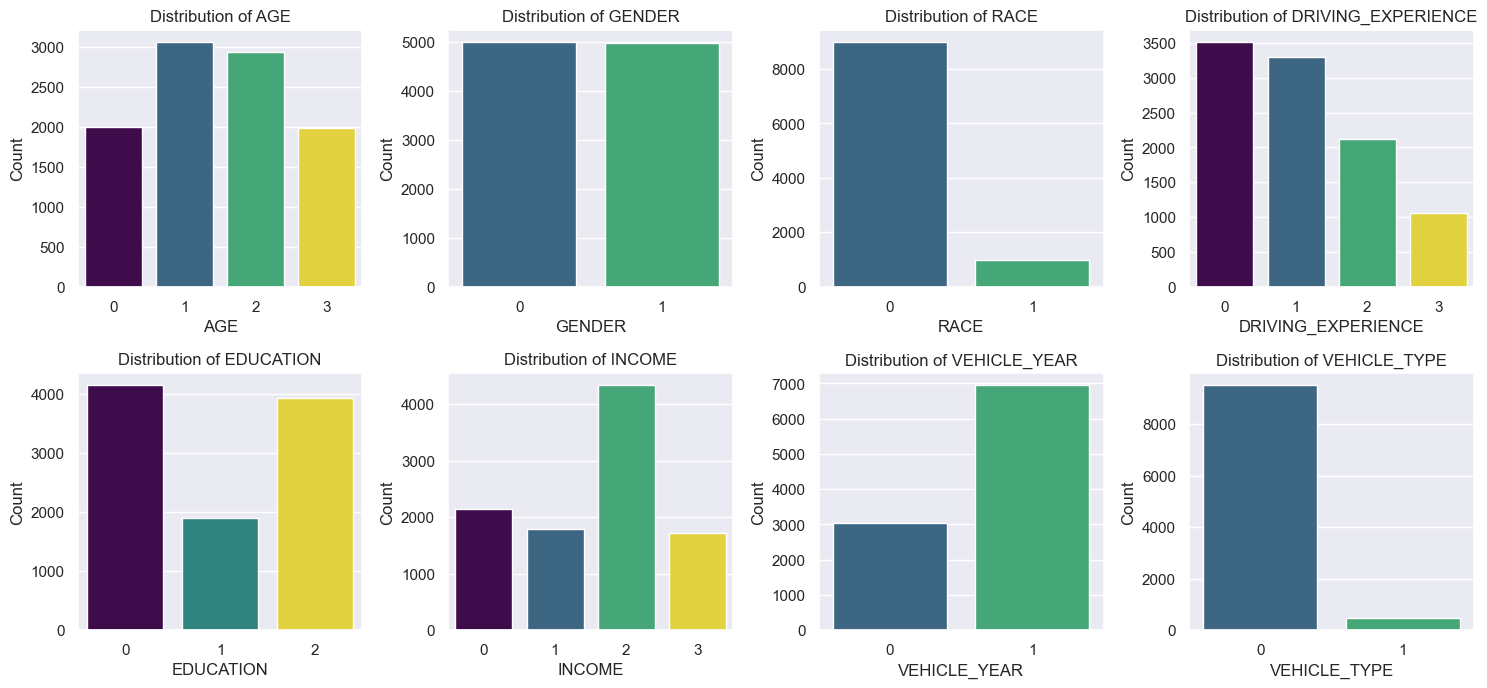

In [45]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Loop through each categorical feature and create a bar chart
for i, feature in enumerate(categorical_col):
    plt.subplot(3, 4, i+1)  # 3 rows, 4 columns layout
    sns.countplot(x=feature, data=df_cleaned, hue=feature, palette='viridis', legend=False)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

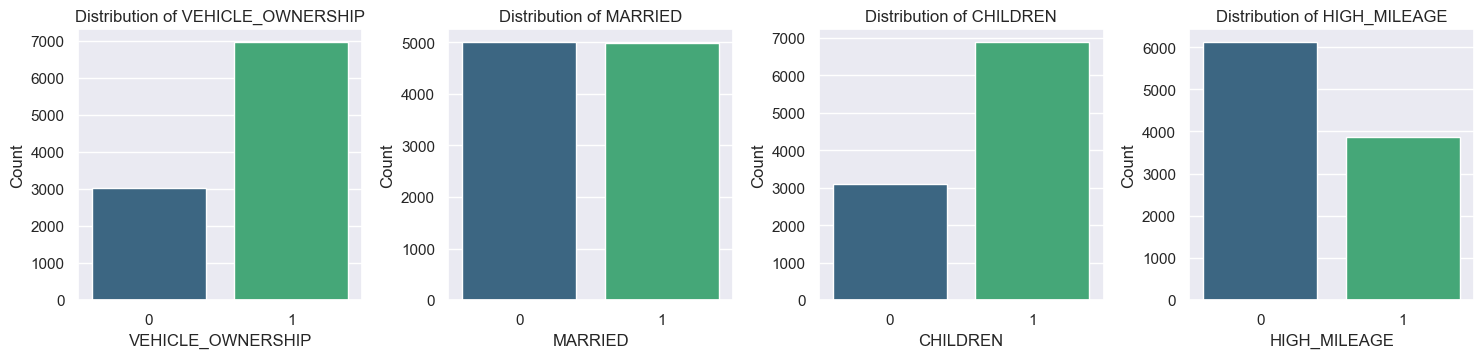

In [46]:
# List of binary categorical columns to plot
binary_categorical_col = ['VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN', 'HIGH_MILEAGE']

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Loop through each categorical feature and create a bar chart
for i, feature in enumerate(binary_categorical_col):
    plt.subplot(3, 4, i+1)  # 3 rows, 4 columns layout
    sns.countplot(x=feature, data=df_cleaned, hue=feature, palette='viridis', legend=False)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [47]:
# Corralation matrix
corr_matrix = df_cleaned[numerical_cols].corr()
corr_matrix

,CREDIT_SCORE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,RISK_SCORE
CREDIT_SCORE,1.000000,-0.181134,0.209071,0.129718,0.180037,0.230524
ANNUAL_MILEAGE,-0.181134,1.000000,-0.326556,-0.118189,-0.196890,-0.284545
SPEEDING_VIOLATIONS,0.209071,-0.326556,1.000000,0.359593,0.442697,0.775263
DUIS,0.129718,-0.118189,0.359593,1.000000,0.259063,0.599423
PAST_ACCIDENTS,0.180037,-0.196890,0.442697,0.259063,1.000000,0.851812
RISK_SCORE,0.230524,-0.284545,0.775263,0.599423,0.851812,1.000000


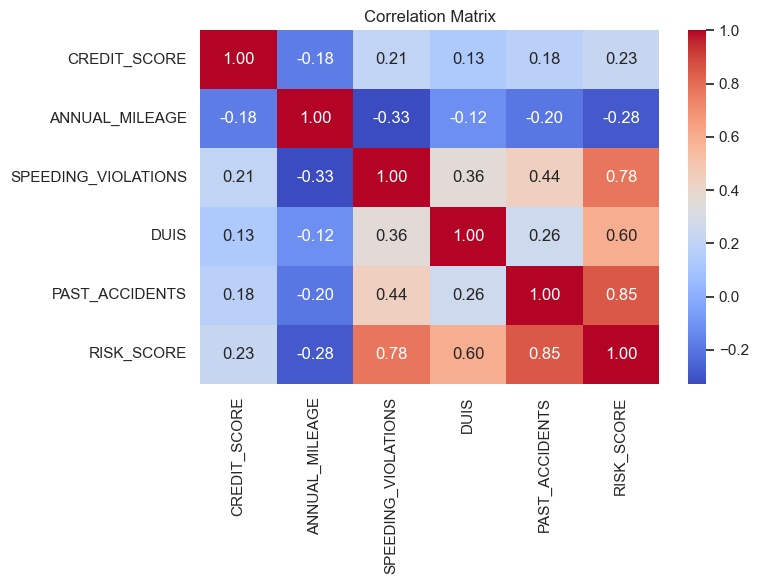

In [48]:
# Heatmap for the numeric features
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

#### Correlation Matrix Summary

The correlation matrix shows generally weak to moderate relationships among numerical features. The strongest positive correlation is between `SPEEDING_VIOLATIONS` and `PAST_ACCIDENTS` (0.44), indicating that drivers with more violations tend to have more accidents. `DUIS` is also moderately correlated with both (`SPEEDING_VIOLATIONS`: 0.36, `PAST_ACCIDENTS`: 0.26). 

`ANNUAL_MILEAGE` shows a weak negative correlation with other features (e.g., -0.33 with `SPEEDING_VIOLATIONS`), suggesting that more frequent drivers may be more cautious. No pair of features exceeds a correlation of 0.8, so multicollinearity is not a concern.


## 5. Data Preprocessing

In [51]:
df = df_cleaned.copy()

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9980 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  9980 non-null   int32  
 1   GENDER               9980 non-null   int32  
 2   RACE                 9980 non-null   int32  
 3   DRIVING_EXPERIENCE   9980 non-null   int32  
 4   EDUCATION            9980 non-null   int32  
 5   INCOME               9980 non-null   int32  
 6   CREDIT_SCORE         9980 non-null   float64
 7   VEHICLE_OWNERSHIP    9980 non-null   int32  
 8   VEHICLE_YEAR         9980 non-null   int32  
 9   MARRIED              9980 non-null   int32  
 10  CHILDREN             9980 non-null   int32  
 11  ANNUAL_MILEAGE       9980 non-null   float64
 12  VEHICLE_TYPE         9980 non-null   int32  
 13  SPEEDING_VIOLATIONS  9980 non-null   int64  
 14  DUIS                 9980 non-null   int64  
 15  PAST_ACCIDENTS       9980 non-null   int64 

In [53]:
# Split features and target
X = df.drop(columns='OUTCOME')
y = df['OUTCOME']

In [54]:
# Ordinal features with meaningful order
ordinal_features = ['AGE', 'EDUCATION', 'INCOME', 'DRIVING_EXPERIENCE', 'VEHICLE_YEAR']

ordinal_categories = [
    [0, 1, 2, 3],  # AGE
    [0, 1, 2],     # EDUCATION
    [0, 1, 2, 3],  # INCOME
    [0, 1, 2, 3],  # DRIVING_EXPERIENCE
    [0, 1]         # VEHICLE_YEAR
]

# Nominal features (no order)
nominal_features = ['GENDER', 'RACE', 'VEHICLE_TYPE']

# Numerical features
numerical_features = [
    'CREDIT_SCORE',
    'ANNUAL_MILEAGE',
    'SPEEDING_VIOLATIONS',
    'DUIS',
    'PAST_ACCIDENTS',
    'RISK_SCORE'  # new feature
]

# Binary features to pass through
binary_features = [
    'VEHICLE_OWNERSHIP',
    'MARRIED',
    'CHILDREN',
    'HIGH_MILEAGE'    # new feature
]

In [55]:
# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=ordinal_categories), ordinal_features),
        ('nom', OneHotEncoder(drop='first'), nominal_features),
        ('num', StandardScaler(), numerical_features)
    ],
    remainder='passthrough'  # keep binary features as they are
)

In [56]:
# Split the data first
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [57]:
# Fitting on training data
preprocessor.fit(X_train)

# Transforming both sets
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

In [58]:
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

C:\Users\seyma\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning:

Could not find the number of physical cores for the following reason:
[WinError 2] Sistem belirtilen dosyayı bulamıyor
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "C:\Users\seyma\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\seyma\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\seyma\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\seyma\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args

## 6. Model Training & Selection

In [60]:
# Logistic Regression
logreg = LogisticRegression( max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [61]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [62]:
# MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

In [63]:
# XGBoost Classifier
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [64]:
# Create a function for evaluation
def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    print(f"\n {model_name} Evaluation")
    print("-" * 40)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("F1 Score:", round(f1_score(y_test, y_pred), 4))
    print("ROC-AUC Score:", round(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]), 4))

In [65]:
evaluate_model(logreg, X_test, y_test, "Logistic Regression")


 Logistic Regression Evaluation
----------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.79      0.85      1372
           1       0.65      0.86      0.74       624

    accuracy                           0.81      1996
   macro avg       0.79      0.83      0.80      1996
weighted avg       0.84      0.81      0.82      1996

Confusion Matrix:
[[1082  290]
 [  85  539]]
F1 Score: 0.7419
ROC-AUC Score: 0.9052


In [66]:
evaluate_model(rf, X_test, y_test, "Random Forest")


 Random Forest Evaluation
----------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      1372
           1       0.75      0.73      0.74       624

    accuracy                           0.84      1996
   macro avg       0.81      0.81      0.81      1996
weighted avg       0.84      0.84      0.84      1996

Confusion Matrix:
[[1219  153]
 [ 170  454]]
F1 Score: 0.7376
ROC-AUC Score: 0.89


In [67]:
evaluate_model(mlp, X_test, y_test, "MLP Neural Network")


 MLP Neural Network Evaluation
----------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1372
           1       0.70      0.67      0.68       624

    accuracy                           0.81      1996
   macro avg       0.77      0.77      0.77      1996
weighted avg       0.80      0.81      0.80      1996

Confusion Matrix:
[[1189  183]
 [ 206  418]]
F1 Score: 0.6824
ROC-AUC Score: 0.85


In [68]:
evaluate_model(xgb, X_test, y_test, "XGBoost")


 XGBoost Evaluation
----------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1372
           1       0.73      0.76      0.74       624

    accuracy                           0.84      1996
   macro avg       0.81      0.81      0.81      1996
weighted avg       0.84      0.84      0.84      1996

Confusion Matrix:
[[1195  177]
 [ 151  473]]
F1 Score: 0.7425
ROC-AUC Score: 0.8896


📌 Based on our current results, **XGBoost** is the best overall performer with the highest F1-score and strong ROC-AUC. It balances precision and recall well. However, if the goal is maximum recall (e.g., don’t miss risky customers), then Logistic Regression is slightly better. In this project, I will go through with XGBoost Classifier.

## 7. Hyperparameter Tuning

In [71]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

##### 🔍 Explanation of Key XGBoost Parameters

- **`n_estimators`**:  
  Number of trees in the ensemble. More trees can improve performance but may lead to overfitting.

- **`max_depth`**:  
  Maximum depth of each tree. Controls model complexity — deeper trees can capture more patterns but risk overfitting.

- **`learning_rate`**:  
  Shrinks the contribution of each tree. Lower values make the model learn more slowly and typically require more trees.

- **`subsample`**:  
  Fraction of the training data (rows) used to train each tree. Helps prevent overfitting by introducing randomness.  
  *(e.g., 0.8 means 80% of rows are randomly sampled for each tree)*

- **`colsample_bytree`**:  
  Fraction of features (columns) used to train each tree. Promotes diversity among trees and reduces overfitting.  
  *(e.g., 0.7 means each tree sees 70% of the features)*


In [73]:
xgb_base = XGBClassifier(eval_metric='logloss', random_state=42)

grid_search = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid,
    cv=3,
    scoring='f1',
    verbose=1,
    n_jobs=-1
)

In [74]:
grid_search.fit(X_train, y_train)  # Use SMOTE-resampled training data

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='f1', verbose=1)

## 8. Model Evaluation

In [76]:
best_xgb = grid_search.best_estimator_

# Evaluate on original test set
evaluate_model(best_xgb, X_test, y_test, "Tuned XGBoost")


 Tuned XGBoost Evaluation
----------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      1372
           1       0.73      0.80      0.76       624

    accuracy                           0.84      1996
   macro avg       0.82      0.83      0.82      1996
weighted avg       0.85      0.84      0.85      1996

Confusion Matrix:
[[1187  185]
 [ 125  499]]
F1 Score: 0.763
ROC-AUC Score: 0.9045


In [77]:
# See best params
print("\n✅ Best Hyperparameters:")
print(grid_search.best_params_)


✅ Best Hyperparameters:
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}


## 9. Pipeline Construction

In [79]:
class ModelBasedImputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.rf_credit = RandomForestRegressor(n_estimators=100, random_state=42)
        self.rf_mileage = RandomForestRegressor(n_estimators=100, random_state=42)
        self.credit_features = ['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
                                'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED', 'CHILDREN',
                                'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']
        self.mileage_features = self.credit_features + ['CREDIT_SCORE']
        self.label_encoders = {}

    def _encode(self, df, fit=False):
        df_encoded = df.copy()
        for col in df_encoded.columns:
            if df_encoded[col].dtype == 'object':
                if fit:
                    le = LabelEncoder()
                    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
                    self.label_encoders[col] = le
                else:
                    le = self.label_encoders[col]
                    df_encoded[col] = le.transform(df_encoded[col].astype(str))
        return df_encoded

    def fit(self, X, y=None):
        X_ = X.copy()
        # Credit Score
        credit_train = X_[X_['CREDIT_SCORE'].notnull()]
        credit_train_encoded = self._encode(credit_train[self.credit_features], fit=True)
        self.rf_credit.fit(credit_train_encoded, credit_train['CREDIT_SCORE'])

        # Annual Mileage
        mileage_train = X_[X_['ANNUAL_MILEAGE'].notnull()]
        mileage_train_encoded = self._encode(mileage_train[self.mileage_features], fit=True)
        self.rf_mileage.fit(mileage_train_encoded, mileage_train['ANNUAL_MILEAGE'])

        return self

    def transform(self, X):
        X_ = X.copy()

        # CREDIT_SCORE imputation
        credit_missing = X_[X_['CREDIT_SCORE'].isnull()]
        if not credit_missing.empty:
            credit_encoded = self._encode(credit_missing[self.credit_features])
            predicted_credit = self.rf_credit.predict(credit_encoded)
            X_.loc[credit_missing.index, 'CREDIT_SCORE'] = predicted_credit

        # ANNUAL_MILEAGE imputation
        mileage_missing = X_[X_['ANNUAL_MILEAGE'].isnull()]
        if not mileage_missing.empty:
            mileage_encoded = self._encode(mileage_missing[self.mileage_features])
            predicted_mileage = self.rf_mileage.predict(mileage_encoded)
            X_.loc[mileage_missing.index, 'ANNUAL_MILEAGE'] = predicted_mileage

        return X_

In [80]:
class FeatureEngineer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_ = X.copy()
        X_['RISK_SCORE'] = (
            X_['SPEEDING_VIOLATIONS'] +
            X_['DUIS'] * 3 +
            X_['PAST_ACCIDENTS'] * 2
        )
        mileage_median = X_['ANNUAL_MILEAGE'].median()
        X_['HIGH_MILEAGE'] = (X_['ANNUAL_MILEAGE'] > mileage_median).astype(int)
        return X_

In [81]:
class ColumnDropper(BaseEstimator, TransformerMixin):
    def __init__(self, drop_cols=None):
        self.drop_cols = drop_cols if drop_cols else []

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(columns=self.drop_cols, errors='ignore')

In [82]:
ordinal_categories_ = [
    ['16-25', '26-39', '40-64', '65+'],                      # AGE
    ['none', 'high school', 'university'],                  # EDUCATION
    ['poverty', 'working class', 'middle class', 'upper class'],  # INCOME
    ['0-9y', '10-19y', '20-29y', '30y+'],                    # DRIVING_EXPERIENCE
    ['before 2015', 'after 2015']                           # VEHICLE_YEAR
]

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=ordinal_categories_), ordinal_features),
        ('nom', OneHotEncoder(drop='first'), nominal_features),
        ('num', StandardScaler(), numerical_features)
    ],
    remainder='passthrough'
)

In [83]:
# Tuned XGBoost model
xgb_best = XGBClassifier(
    eval_metric='logloss',
    colsample_bytree=1.0,
    learning_rate=0.1,
    max_depth=5,
    n_estimators=100,
    subsample=0.8,
    random_state=42
)

In [84]:
full_pipeline = Pipeline([
    ('drop_columns', ColumnDropper(drop_cols=['ID', 'POSTAL_CODE'])),
    ('imputer', ModelBasedImputer()),
    ('feature_engineer', FeatureEngineer()),
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', xgb_best)
])

In [85]:
df_pipeline = pd.read_csv("Car_Insurance_Claim.csv")

X = df_pipeline.drop(columns='OUTCOME')
y = df_pipeline['OUTCOME']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Fit full pipeline
full_pipeline.fit(X_train, y_train)

# Evaluate
evaluate_model(full_pipeline, X_test, y_test, "FULL PIPELINE: XGBoost + Imputation + Feature Engineering")


 FULL PIPELINE: XGBoost + Imputation + Feature Engineering Evaluation
----------------------------------------
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.85      0.87      1373
         1.0       0.70      0.76      0.73       627

    accuracy                           0.82      2000
   macro avg       0.80      0.81      0.80      2000
weighted avg       0.83      0.82      0.83      2000

Confusion Matrix:
[[1171  202]
 [ 149  478]]
F1 Score: 0.7314
ROC-AUC Score: 0.8817


##### Feature Importance

In [87]:
# Access the XGBoost model from the pipeline
xgb_model = full_pipeline.named_steps['classifier']

# Get feature importances (after all preprocessing)
importances = xgb_model.feature_importances_

# Get feature names after preprocessing
feature_names = full_pipeline.named_steps['preprocessor'].get_feature_names_out()

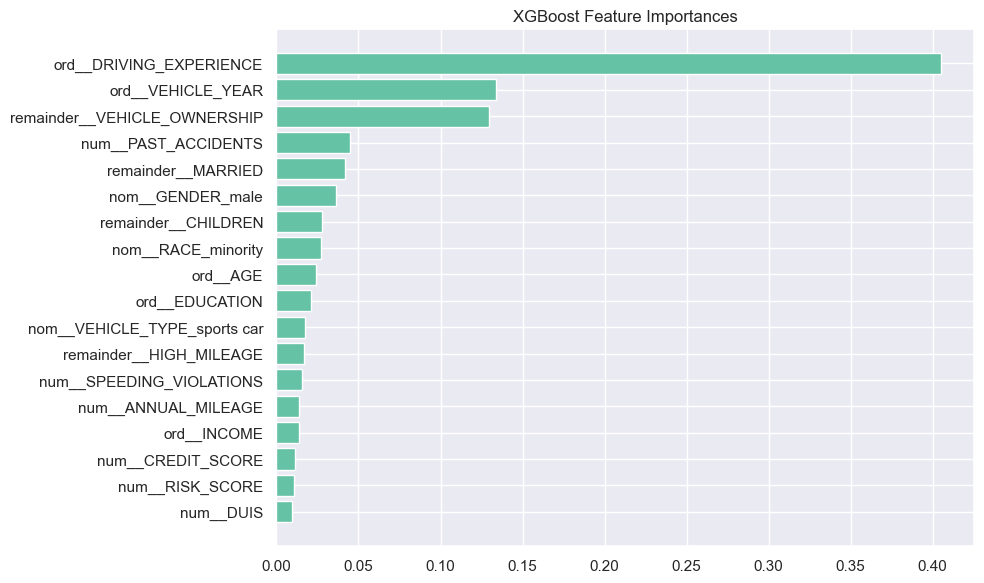

In [88]:
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
plt.gca().invert_yaxis()
plt.title("XGBoost Feature Importances")
plt.tight_layout()
plt.show()

In [89]:
import pickle

# Save your full pipeline (model + preprocessing + SMOTE)
with open("car_insurance_pipeline.pkl", "wb") as f:
    pickle.dump(full_pipeline, f)